# Training Denoisers with Noise Texture Augmentation

The goal of this notebook is to introduce the noise texture augmentation loop previously introduced in [00_characterizing_noise_augmentation.ipynb](00_characterizing_noise_augmentation.ipynb) as well as provides a mean for selecting the $\lambda$ parameter controlling the amount of data augmentation.

![augmented training](figures/fig1b_augmented.png)
*Figure 1b In noise texture augmented training noise patches are added to the low noise training target to make new augmented inputs. While training, a proportion λ of the training data mini batch is from the augmented inputs while the remaining 1 − λ is from the original low dose training inputs.*

If reproducing these figures on your own local dataset, replace `base_dir` with your download location of the dataset available for download at [Zenodo](https://zenodo.org/doi/10.5281/zenodo.10064035)

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.11267694.svg)](https://doi.org/10.5281/zenodo.11267694)

These phantom simulations were generated using the [pediatricIQphantoms](https://github.com/DIDSR/pediatricIQphantoms), please see the associated [documentation](https://pediatriciqphantoms.readthedocs.io/en/latest/?badge=latest) on how to rerun the simulations under different imaging conditions.

In [1]:
from pathlib import Path
from dotenv import load_dotenv
import os

load_dotenv()

ldgc_path = Path(os.environ['LDGC_PATH']) # training dataset
peds_datadir = Path(os.environ['PEDIATRICIQ_PATH']) # testing dataset
# anthro_datadir = Path(os.environ['ANTHROPOMORPHIC_PATH']) # testing dataset

ldgc_path.exists(), peds_datadir.exists()

(True, True)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../denoising')
from data import AugmentedDataModule

With abdomen scans ()

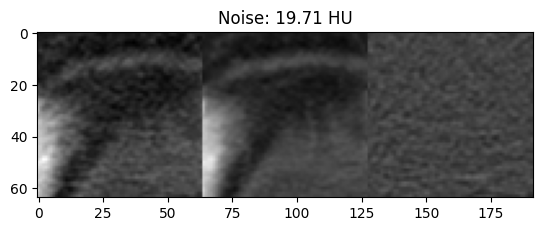

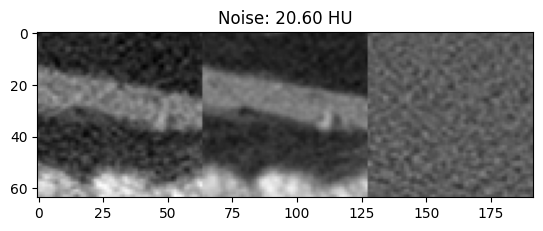

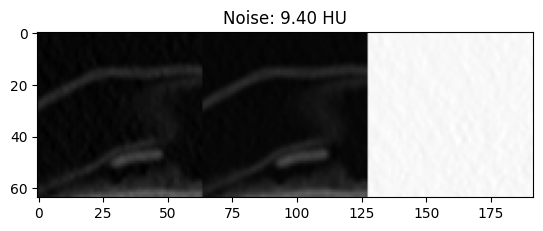

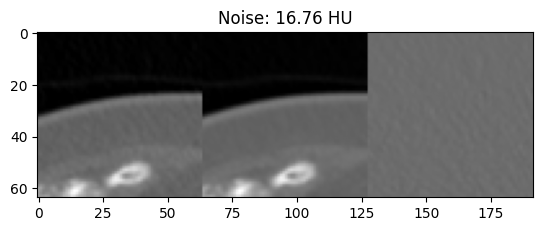

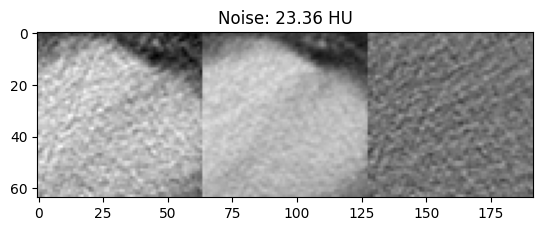

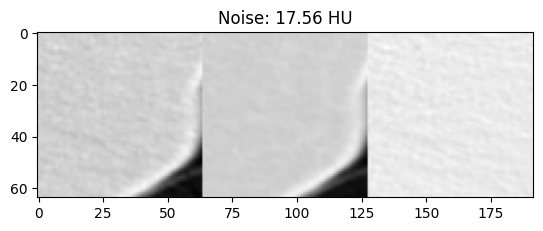

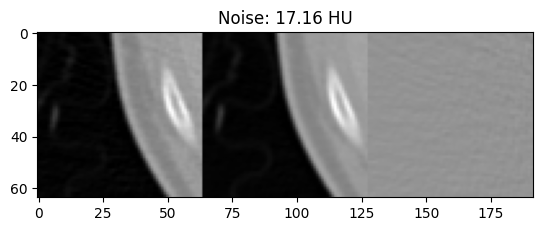

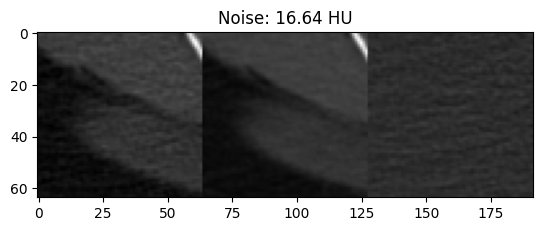

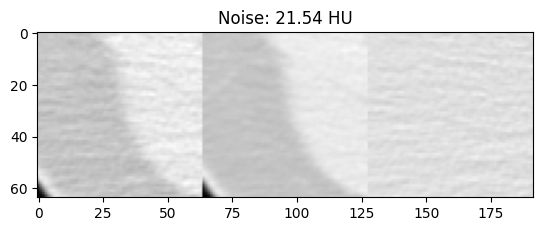

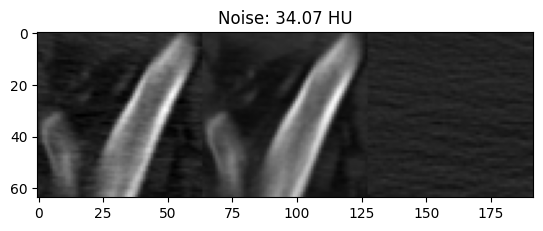

average noise difference: 19.68 HU


In [26]:
region = 'abdomen'
proportion = 0
dm = AugmentedDataModule('MayoLDGCDataset', {'root': os.environ['LDGC_PATH'], 'region': region},
                         'PediatricIQDataset', {'root': os.environ['PEDIATRICIQ_PATH'], 'phantom':'uniform'}, shuffle=False, num_workers=1, batch_size=5, patch_size=64, proportion=proportion)
dm.setup('fit')
augdl = dm.train_dataloader()

disp = dict(cmap='gray')

count = 0
noise_lvls = []
for x, y in augdl:
    for idx in range(len(x)):
        noise = x[idx].squeeze()-y[idx].squeeze()
        noise_lvl = noise.std()
        plt.imshow(np.concat((x[idx].squeeze(), y[idx].squeeze(), noise), axis=1), **disp)
        plt.title(f'Noise: {noise_lvl:2.2f} HU')
        plt.show()
        noise_lvls.append(noise_lvl)
    count += 1
    if count > 1:
        break
print(f'average noise difference: {np.mean(noise_lvls):2.2f} HU')

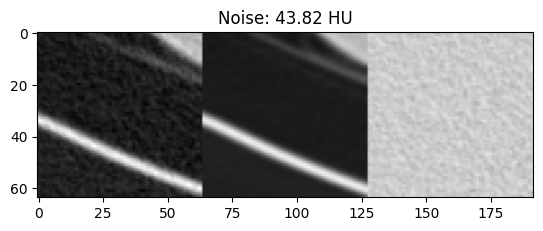

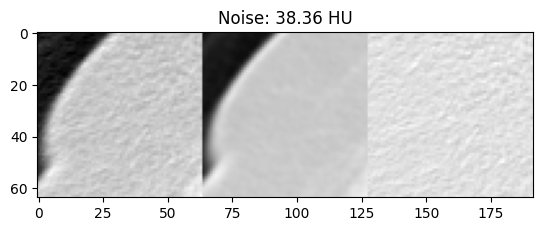

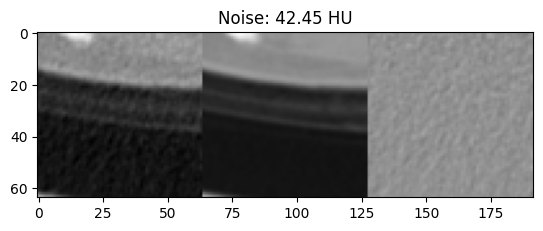

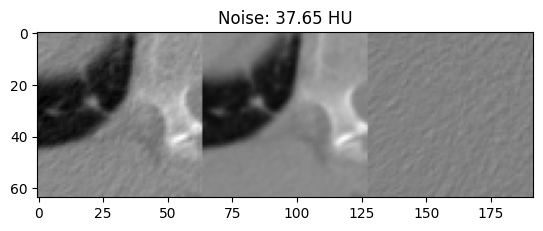

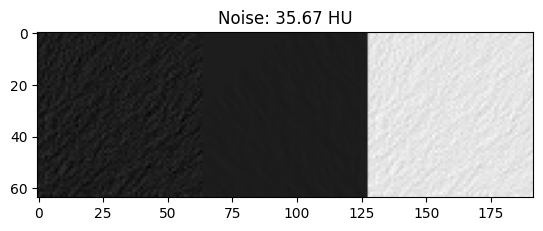

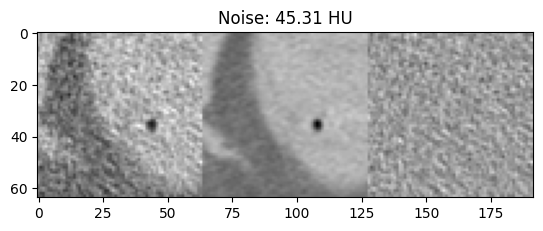

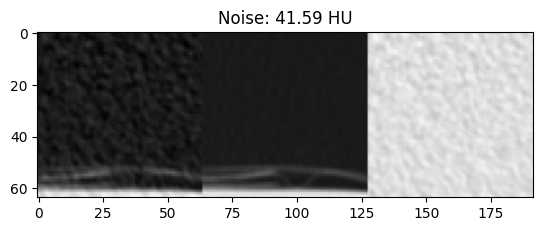

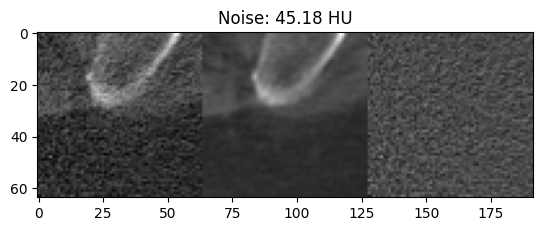

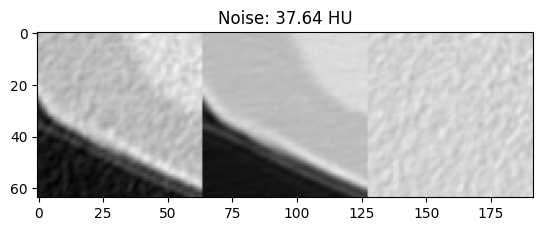

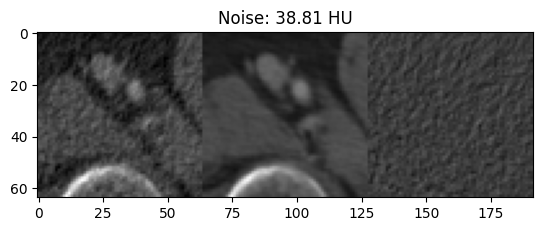

average noise difference: 40.65 HU


In [27]:
region = 'abdomen'
proportion = 1.0
dm = AugmentedDataModule('MayoLDGCDataset', {'root': os.environ['LDGC_PATH'], 'region': region},
                         'PediatricIQDataset', {'root': os.environ['PEDIATRICIQ_PATH'], 'phantom':'uniform'}, shuffle=False, num_workers=1, batch_size=5, patch_size=64, proportion=proportion)
dm.setup('fit')
augdl = dm.train_dataloader()

disp = dict(cmap='gray')

count = 0
noise_lvls = []
for x, y in augdl:
    for idx in range(len(x)):
        noise = x[idx].squeeze()-y[idx].squeeze()
        noise_lvl = noise.std()
        plt.imshow(np.concat((x[idx].squeeze(), y[idx].squeeze(), noise), axis=1), **disp)
        plt.title(f'Noise: {noise_lvl:2.2f} HU')
        plt.show()
        noise_lvls.append(noise_lvl)
    count += 1
    if count > 1:
        break
print(f'average noise difference: {np.mean(noise_lvls):2.2f} HU')


When you add noise augmentation to this dataset (with smaller noise differences between LD and RD) then the average noise diff increases.

But the chest dataset has greater noise differences between LD and RD, thus augmenting has less impact.

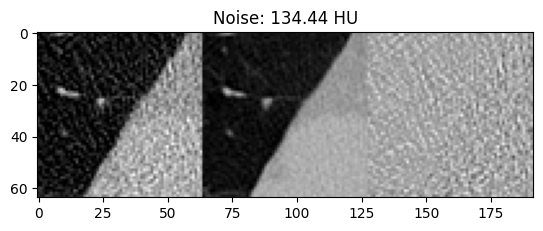

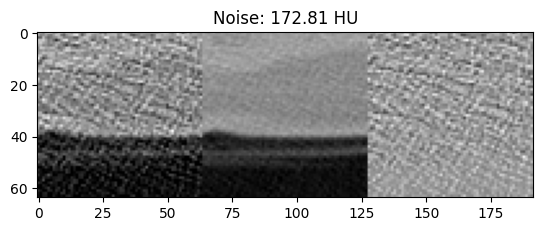

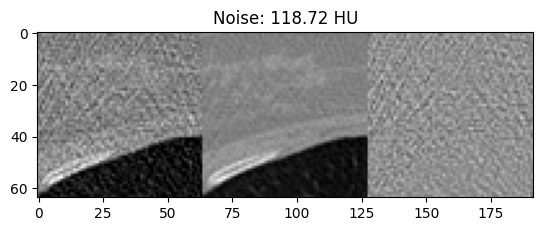

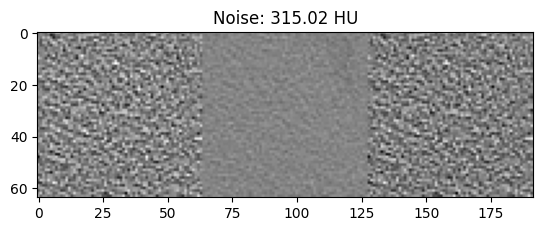

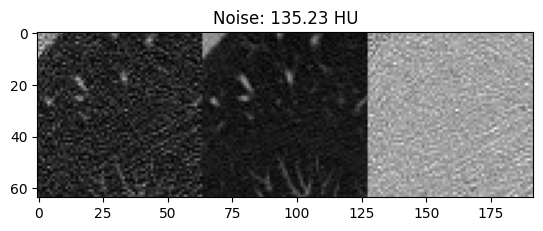

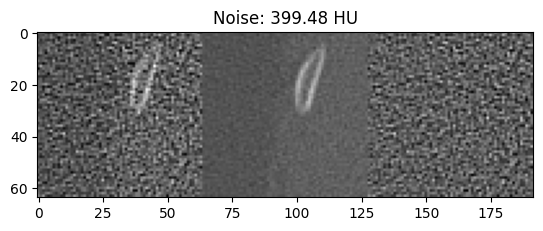

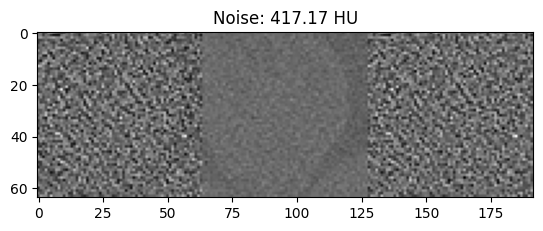

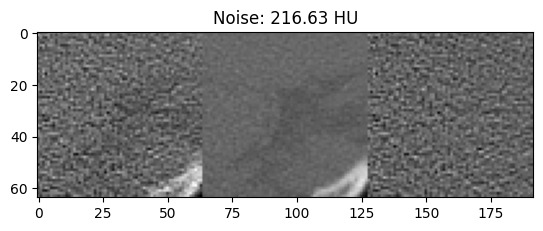

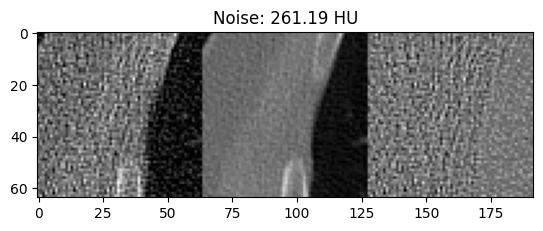

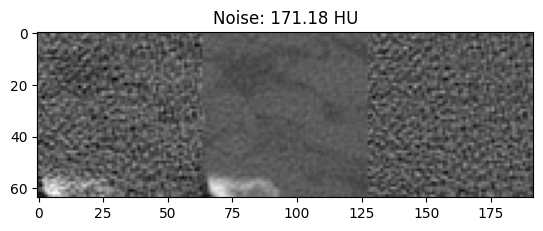

average noise difference: 234.19 HU


In [28]:
region = 'chest'
proportion = 0
dm = AugmentedDataModule('MayoLDGCDataset', {'root': os.environ['LDGC_PATH'], 'region': region},
                         'PediatricIQDataset', {'root': os.environ['PEDIATRICIQ_PATH'], 'phantom':'uniform'}, shuffle=False, num_workers=1, batch_size=5, patch_size=64, proportion=proportion)
dm.setup('fit')
augdl = dm.train_dataloader()

disp = dict(cmap='gray')

count = 0
noise_lvls = []
for x, y in augdl:
    for idx in range(len(x)):
        noise = x[idx].squeeze()-y[idx].squeeze()
        noise_lvl = noise.std()
        plt.imshow(np.concat((x[idx].squeeze(), y[idx].squeeze(), noise), axis=1), **disp)
        plt.title(f'Noise: {noise_lvl:2.2f} HU')
        plt.show()
        noise_lvls.append(noise_lvl)
    count += 1
    if count > 1:
        break
print(f'average noise difference: {np.mean(noise_lvls):2.2f} HU')

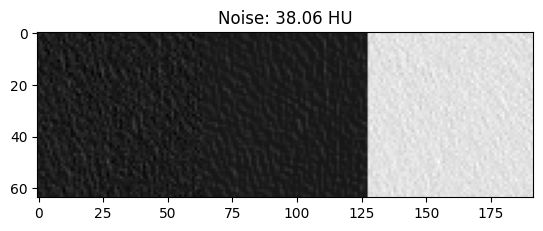

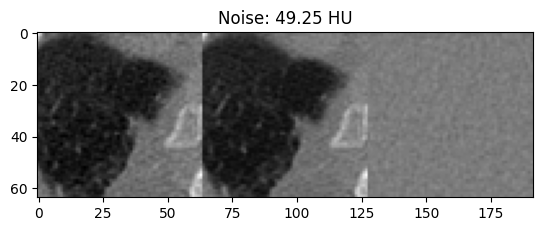

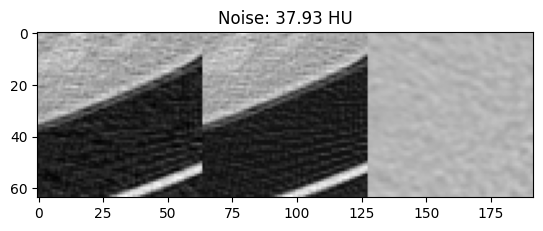

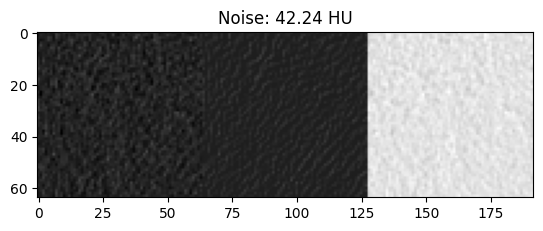

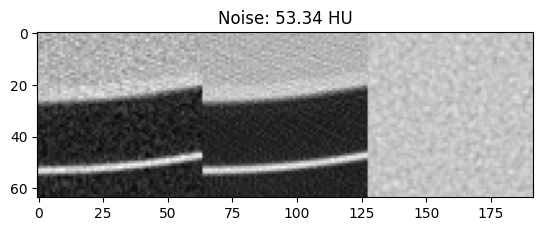

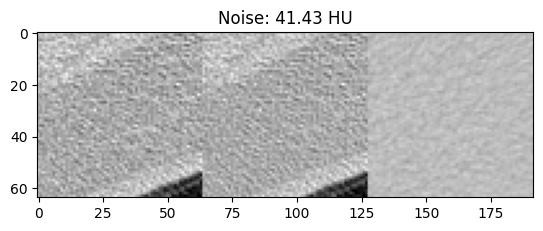

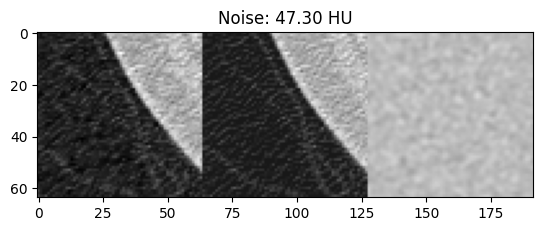

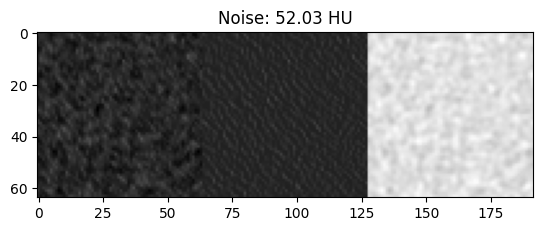

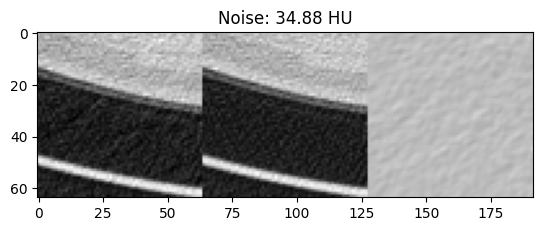

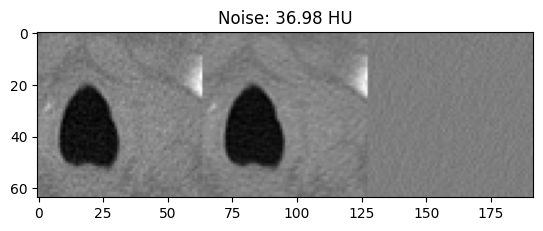

average noise difference: 43.34 HU


In [29]:
region = 'chest'
proportion = 1.0
dm = AugmentedDataModule('MayoLDGCDataset', {'root': os.environ['LDGC_PATH'], 'region': region},
                         'PediatricIQDataset', {'root': os.environ['PEDIATRICIQ_PATH'], 'phantom':'uniform'}, shuffle=False, num_workers=1, batch_size=5, patch_size=64, proportion=proportion)
dm.setup('fit')
augdl = dm.train_dataloader()

disp = dict(cmap='gray')

count = 0
noise_lvls = []
for x, y in augdl:
    for idx in range(len(x)):
        noise = x[idx].squeeze()-y[idx].squeeze()
        noise_lvl = noise.std()
        plt.imshow(np.concat((x[idx].squeeze(), y[idx].squeeze(), noise), axis=1), **disp)
        plt.title(f'Noise: {noise_lvl:2.2f} HU')
        plt.show()
        noise_lvls.append(noise_lvl)
    count += 1
    if count > 1:
        break
print(f'average noise difference: {np.mean(noise_lvls):2.2f} HU')

If interested in retraining models, the Mayo Clinic Low Dose Grand Challenge (LDGC) dataset is available for download from the Cancer Imaging Archive: [https://doi.org/10.7937/9npb-2637](https://www.cancerimagingarchive.net/collection/ldct-and-projection-data/) for more information on the dataset please see [CTCIC/patient-ct-projection-data-library](https://ctcicblog.mayo.edu/patient-ct-projection-data-library/)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import SimpleITK as sitk

meta = pd.read_csv(peds_datadir / 'metadata.csv')
# meta.file = meta.file.apply(lambda o: peds_datadir / o)
meta = meta[meta.recon == 'fbp']
meta.rename(columns={'repeat':'instance'}, inplace=True)

anthro_meta =  pd.read_csv(anthro_datadir / 'metadata.csv')
anthro_meta.file = anthro_meta.file.apply(lambda o: anthro_datadir / o)
anthro_meta = anthro_meta[anthro_meta.recon == 'fbp']
anthro_meta.studyid = anthro_meta.studyid + 1 + meta.studyid.max()
meta = pd.concat([meta, anthro_meta], ignore_index=True)

meta.head()

Name  effective diameter [cm]  age [year] pediatric subgroup  \
0  11.2 cm CTP404                     11.2    0.083333            newborn   
1  11.2 cm CTP404                     11.2    0.083333            newborn   
2  11.2 cm CTP404                     11.2    0.083333            newborn   
3  11.2 cm CTP404                     11.2    0.083333            newborn   
4  11.2 cm CTP404                     11.2    0.083333            newborn   

  phantom                     scanner  Dose [%] recon kernel  FOV [cm]  ...  \
0  CTP404  Siemens Somatom Definition      25.0   fbp    D45      12.3  ...   
1  CTP404  Siemens Somatom Definition      25.0   fbp    D45      12.3  ...   
2  CTP404  Siemens Somatom Definition      25.0   fbp    D45      12.3  ...   
3  CTP404  Siemens Somatom Definition      25.0   fbp    D45      12.3  ...   
4  CTP404  Siemens Somatom Definition      25.0   fbp    D45      12.3  ...   

  instance  Unnamed: 0  Code # gender  weight [kg]  height [cm] BMI  \
0        0         NaN     NaN    NaN          NaN          NaN NaN   
1        1         NaN     NaN    NaN          NaN          NaN NaN   
2        2         NaN     NaN    NaN          NaN          NaN NaN   
3        3         NaN     NaN    NaN          NaN          NaN NaN   
4        4         NaN     NaN    NaN          NaN          NaN NaN   

  weight percentile  ethnicity  simulated  
0               NaN        NaN        NaN  
1               NaN        NaN        NaN  
2               NaN        NaN        NaN  
3               NaN        NaN        NaN  
4               NaN        NaN        NaN  

[5 rows x 24 columns]

In [ ]:
meta.studyid.unique()

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231,
       234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 262, 265, 268,
       271, 274, 277, 280, 283, 286, 289, 292, 295, 298, 301, 304, 307,
       310, 313, 316, 319, 322, 325, 328, 331, 334, 337, 340, 343, 346,
       349, 352, 355, 358, 361, 364, 367, 370, 373, 376, 379, 382, 385,
       388, 391, 394, 397, 400, 403, 406, 409, 412, 415, 418, 421, 424,
       427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463,
       466, 469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502,
       505, 508, 511, 514, 517, 520, 523])

This the lower studyids are the iq phantoms, the upper are anthropomorphic

In [ ]:
anthro_meta.studyid.unique()

array([262, 265, 268, 271, 274, 277, 280, 283, 286, 289, 292, 295, 298,
       301, 304, 307, 310, 313, 316, 319, 322, 325, 328, 331, 334, 337,
       340, 343, 346, 349, 352, 355, 358, 361, 364, 367, 370, 373, 376,
       379, 382, 385, 388, 391, 394, 397, 400, 403, 406, 409, 412, 415,
       418, 421, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454,
       457, 460, 463, 466, 469, 472, 475, 478, 481, 484, 487, 490, 493,
       496, 499, 502, 505, 508, 511, 514, 517, 520, 523])

In [ ]:
meta[meta.studyid == 3]

Name  effective diameter [cm]  age [year] pediatric subgroup  \
19  11.2 cm CTP404                     11.2    0.083333            newborn   
20  11.2 cm CTP404                     11.2    0.083333            newborn   
21  11.2 cm CTP404                     11.2    0.083333            newborn   
22  11.2 cm CTP404                     11.2    0.083333            newborn   
23  11.2 cm CTP404                     11.2    0.083333            newborn   
24  11.2 cm CTP404                     11.2    0.083333            newborn   
25  11.2 cm CTP404                     11.2    0.083333            newborn   
26  11.2 cm CTP404                     11.2    0.083333            newborn   
27  11.2 cm CTP404                     11.2    0.083333            newborn   
28  11.2 cm CTP404                     11.2    0.083333            newborn   
29  11.2 cm CTP404                     11.2    0.083333            newborn   
30  11.2 cm CTP404                     11.2    0.083333            newborn   
31  11.2 cm CTP404                     11.2    0.083333            newborn   
32  11.2 cm CTP404                     11.2    0.083333            newborn   
33  11.2 cm CTP404                     11.2    0.083333            newborn   
34  11.2 cm CTP404                     11.2    0.083333            newborn   
35  11.2 cm CTP404                     11.2    0.083333            newborn   
36  11.2 cm CTP404                     11.2    0.083333            newborn   
37  11.2 cm CTP404                     11.2    0.083333            newborn   
38  11.2 cm CTP404                     11.2    0.083333            newborn   

   phantom                     scanner  Dose [%] recon kernel  FOV [cm]  ...  \
19  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
20  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
21  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
22  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
23  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
24  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
25  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
26  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
27  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
28  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
29  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
30  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
31  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
32  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
33  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
34  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
35  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
36  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
37  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   
38  CTP404  Siemens Somatom Definition     100.0   fbp    D45      12.3  ...   

   instance  Unnamed: 0  Code # gender  weight [kg]  height [cm] BMI  \
19        0         NaN     NaN    NaN          NaN          NaN NaN   
20        1         NaN     NaN    NaN          NaN          NaN NaN   
21        2         NaN     NaN    NaN          NaN          NaN NaN   
22        3         NaN     NaN    NaN          NaN          NaN NaN   
23        4         NaN     NaN    NaN          NaN          NaN NaN   
24        5         NaN     NaN    NaN          NaN          NaN NaN   
25        6         NaN     NaN    NaN          NaN          NaN NaN   
26        7         NaN     NaN    NaN          NaN          NaN NaN   
27        8         NaN     NaN    NaN        

In [ ]:
meta[meta.studyid == 3].file.iloc[0]

'../data/pediatricIQphantoms/CTP404/diameter_112mm/dose_100/fbp/112mm_CTP404_000.dcm'

In [ ]:
meta[meta.studyid == 173]

Empty DataFrame
Columns: [Name, effective diameter [cm], age [year], pediatric subgroup, phantom, scanner, Dose [%], recon, kernel, FOV [cm], file, patientid, studyid, series, instance, Unnamed: 0, Code #, gender, weight [kg], height [cm], BMI, weight percentile, ethnicity, simulated]
Index: []

[0 rows x 24 columns]

idx = 0
for name in anthro_meta.Name.unique():
    for dose in anthro_meta[(anthro_meta.Name == name)]['Dose [%]'].unique():
        anthro_meta.loc[(anthro_meta.Name == name)&(anthro_meta['Dose [%]'] == dose), 'studyid'] = int(idx)
        idx += 1
anthro_meta.studyid = anthro_meta.studyid.astype(int)
anthro_meta.file = anthro_meta.file.apply(lambda o: Path(o.relative_to('../data/pediatricIQphantoms/')))
anthro_meta.to_csv(anthro_datadir / 'metadata.csv')
anthro_meta

In [ ]:
# anthro_meta =  pd.read_csv(anthro_datadir / 'metadata.csv')
# anthro_meta.file = anthro_meta.file.apply(lambda o: peds_datadir / o)
# anthro_meta = anthro_meta[anthro_meta.recon == 'fbp']
# anthro_meta

In [ ]:
meta.phantom.unique()

array(['CTP404', 'MITA-LCD', 'uniform', 'anthropomorphic'], dtype=object)

In [ ]:
import sys
sys.path.append('..')

from utils import circle_select, get_circle_diameter, load_img, load_vol, ctshow

In [ ]:
get_circle_diameter?

Signature: get_circle_diameter(img)
Docstring:
Assumes an image of a uniform water phantom that can be easily
segmented using a mean intensity threshold

A = pi r^2 --> r = sqrt(A/pi) --> d = 2*r = 2*sqrt(A/pi)
File:      ~/Dev/PediatricCTSizeAugmentation/notebooks/utils.py
Type:      function

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)


cuda


In [ ]:
phantom = 'uniform'
doses = []
stds = []
means = []
imgs = []
diams = []
fovs=[]
lambdas = []
recons = []
img_dict = {}

batch_size = 20

results_csv = Path('results/lambda_vals.csv')

if results_csv.exists():
    df = pd.read_csv(results_csv)
else:
    redcnn = load_model(f'models/lambda{int(0):03d}').to(device)
    for recon in ['fbp', 'RED-CNN', 'RED-CNN augmented']:
        for dose in [25, 100]:
            for diam in meta[meta.phantom==phantom]['effective diameter [cm]'].unique():
                vol = load_mhd(meta[(meta['Dose [%]'] == dose) &
                             (meta.phantom == phantom) &
                             (meta['effective diameter [cm]'] == diam)].file.item()) #try different phantom sizes and compare if lambda value changes
                fov=meta[(meta['Dose [%]'] == dose) &
                             (meta.phantom == phantom) &
                             (meta['effective diameter [cm]'] == diam)]['FOV [cm]'].item()
                lambda_dict = {}
                for lmbda in range(11):
                    lmbda/=10
                    if recon == 'RED-CNN':
                        model_path = Path(f'models/lambda{int(0):03d}')
                    else:
                        model_path = Path(f'models/lambda{int(lmbda*100):03d}')
                    if (recon == 'fbp'):
                        denoised = vol
                    else:
                        model = load_model(model_path).to(device)
                        denoised = model.predict(vol[:, None], device=device, batch_size=batch_size).squeeze()
                    roi = circle_select(vol[0], (vol[0].shape[0]//2, vol[0].shape[1]//2), r/3)
                    # ctshow(denoised[0])
                    # plt.imshow(roi, cmap='Reds', alpha=0.05)
                    std = denoised[:, roi].std(axis=1).mean()
                    mean = denoised[:, roi].std(axis=1).mean()
                    # plt.title(f'{recon} {dose}% dose\ndiam: {diam} cm, $\lambda$: {lmbda} std: {std:2.2f}')
                    # plt.show()
                    doses.append(dose)
                    stds.append(std)
                    means.append(mean)
                    diams.append(diam)
                    lambdas.append(lmbda)
                    fovs.append(fov)
                    recons.append(recon)
                #     lambda_dict[lmbda] = denoised[0]
                #     print(denoised[0].shape)
                # img_dict[diam] = lambda_dict
    df = pd.DataFrame({'effective diameter [cm]':diams,
                       'FOV [cm]':fovs,
                       'Dose [%]': doses,
                       'recon': recons,
                       'lambda': lambdas,
                       'mean [HU]': means,
                       'std [HU]': stds})
    df.to_csv(results_csv, index=False)

In [ ]:
df

effective diameter [cm]  FOV [cm]  Dose [%]              recon  lambda  \
0                       35.0      39.0        25                fbp     0.0   
1                       35.0      39.0        25                fbp     0.1   
2                       35.0      39.0        25                fbp     0.2   
3                       35.0      39.0        25                fbp     0.3   
4                       35.0      39.0        25                fbp     0.4   
..                       ...       ...       ...                ...     ...   
523                     15.1      17.0       100  RED-CNN augmented     0.6   
524                     15.1      17.0       100  RED-CNN augmented     0.7   
525                     15.1      17.0       100  RED-CNN augmented     0.8   
526                     15.1      17.0       100  RED-CNN augmented     0.9   
527                     15.1      17.0       100  RED-CNN augmented     1.0   

     mean [HU]   std [HU]  
0    46.542552  46.542552  
1    46.542552  46.542552  
2    46.542552  46.542552  
3    46.542552  46.542552  
4    46.542552  46.542552  
..         ...        ...  
523   7.009116   7.009116  
524   7.847940   7.847940  
525   6.893947   6.893947  
526   8.152205   8.152205  
527   9.043079   9.043079  

[528 rows x 7 columns]

Add hi dose and low dose values...

In [ ]:
df['effective diameter [cm]'].unique()

array([35. , 11.2, 18.5, 20. , 21.6, 13.1, 29.2, 15.1])

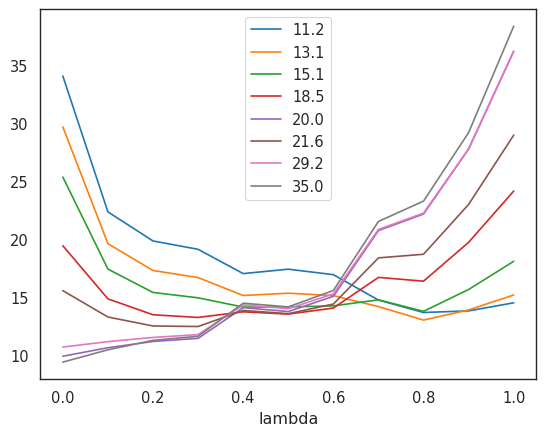

In [ ]:
f, ax = plt.subplots()
for diam in sorted(df['effective diameter [cm]'].unique()):
    df[(df['Dose [%]']==25)&(df.recon=='RED-CNN augmented')&(df['effective diameter [cm]']==diam)].plot(x='lambda', y='std [HU]', label=diam,ax=ax)
plt.show()

In [ ]:
from utils import pediatric_subgroup
df['pediatric subgroup'] = df['effective diameter [cm]'].apply(pediatric_subgroup)
df

effective diameter [cm]  FOV [cm]  Dose [%]              recon  lambda  \
0                       35.0      39.0        25                fbp     0.0   
1                       35.0      39.0        25                fbp     0.1   
2                       35.0      39.0        25                fbp     0.2   
3                       35.0      39.0        25                fbp     0.3   
4                       35.0      39.0        25                fbp     0.4   
..                       ...       ...       ...                ...     ...   
523                     15.1      17.0       100  RED-CNN augmented     0.6   
524                     15.1      17.0       100  RED-CNN augmented     0.7   
525                     15.1      17.0       100  RED-CNN augmented     0.8   
526                     15.1      17.0       100  RED-CNN augmented     0.9   
527                     15.1      17.0       100  RED-CNN augmented     1.0   

     mean [HU]   std [HU] pediatric subgroup  
0    46.542552  46.542552              adult  
1    46.542552  46.542552              adult  
2    46.542552  46.542552              adult  
3    46.542552  46.542552              adult  
4    46.542552  46.542552              adult  
..         ...        ...                ...  
523   7.009116   7.009116            newborn  
524   7.847940   7.847940            newborn  
525   6.893947   6.893947            newborn  
526   8.152205   8.152205            newborn  
527   9.043079   9.043079            newborn  

[528 rows x 8 columns]

<Axes: xlabel='lambda', ylabel='std [HU]'>

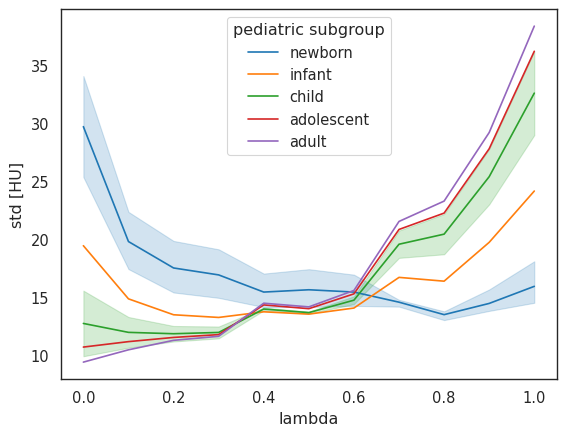

In [ ]:
hue_order = ['newborn', 'infant', 'child', 'adolescent', 'adult']
sns.lineplot(data=df[(df['Dose [%]']==25) &
                     (df.recon=='RED-CNN augmented')],
             x='lambda', y='std [HU]', hue='pediatric subgroup', hue_order=hue_order)

This plot is really interesting too, in the transition of child sizes (around 19-20 cm) the plot switches from a downward slope with less noise (more performance at higher lambda) to upward slope, so the decision in lambda value really depends on your intended population. For the paper I took the average across pediatric sizes but it could be valuable to show both

In [ ]:
df.columns

Index(['effective diameter [cm]', 'FOV [cm]', 'Dose [%]', 'recon', 'lambda',
       'mean [HU]', 'std [HU]'],
      dtype='object')

In [ ]:
sorted(df['FOV [cm]'].unique())

[12.0, 14.0, 17.0, 20.0, 24.0, 32.0, 34.0, 39.0]

In [ ]:
means = df.groupby(['recon', 'Dose [%]', 'lambda']).mean()
means

effective diameter [cm]  FOV [cm]  mean [HU]  \
recon   Dose [%] lambda                                                 
RED-CNN 25       0.0                     20.4625      24.0  19.245397   
                 0.1                     20.4625      24.0  19.245397   
                 0.2                     20.4625      24.0  19.245398   
                 0.3                     20.4625      24.0  19.245397   
                 0.4                     20.4625      24.0  19.245397   
...                                          ...       ...        ...   
fbp     100      0.6                     20.4625      24.0  23.508144   
                 0.7                     20.4625      24.0  23.508144   
                 0.8                     20.4625      24.0  23.508144   
                 0.9                     20.4625      24.0  23.508144   
                 1.0                     20.4625      24.0  23.508144   

                          std [HU]  
recon   Dose [%] lambda             
RED-CNN 25       0.0     19.245397  
                 0.1     19.245397  
                 0.2     19.245398  
                 0.3     19.245397  
                 0.4     19.245397  
...                            ...  
fbp     100      0.6     23.508144  
                 0.7     23.508144  
                 0.8     23.508144  
                 0.9     23.508144  
                 1.0     23.508144  

[66 rows x 4 columns]

In [ ]:
meta[meta.phantom=='uniform'].studyid.unique()

array([ 96,  99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132,
       135, 138, 141, 358, 361, 364, 367, 370, 373, 376, 379, 382, 385,
       388, 391, 394, 397, 400, 403])

In [ ]:
meta[meta.phantom=='anthropomorphic'].studyid.unique()

array([144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180,
       183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219,
       222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258,
       261, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436, 439,
       442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475, 478,
       481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517,
       520, 523])

Let's look at a couple of example images, feel free to change lambda_val to inspect different models (consider preloading a bunch and making this an interactive widget to easily browse models and images)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


(200, 512, 512)


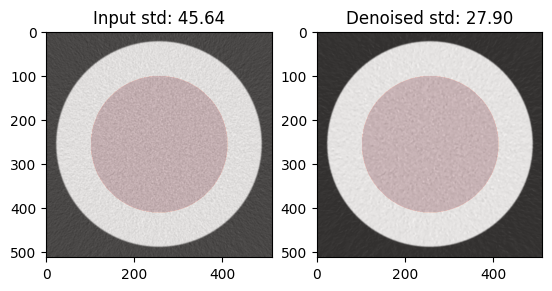

45.247250492750666 27.498138


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


(200, 512, 512)


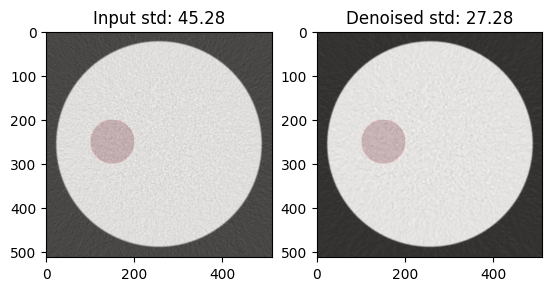

In [ ]:
lambda_val = 0
device = 'cpu'
model = load_model(f'models/lambda{int(lambda_val):03d}').to(device)

seed = 42
rng = np.random.default_rng(seed=seed)
studyid = rng.choice(meta[(meta.phantom == 'uniform')].studyid.unique())

fname = meta[meta.studyid==studyid].file 
img = sitk.ReadImage(fname)
vol = sitk.GetArrayFromImage(img)
denoised = model.predict(vol[:20])
print(vol.shape)

r = get_circle_diameter(vol[0])
roi = circle_select(vol[0], (vol[0].shape[0]//2, vol[0].shape[1]//2), r/3)

f, axs = plt.subplots(1, 2)
axs[0].imshow(vol[0], cmap='gray')
axs[0].imshow(roi, cmap='Reds', alpha=0.2)
axs[0].set_title(f'Input std: {vol[0][roi].std():2.2f}')

axs[1].imshow(denoised[0], cmap='gray')
axs[1].imshow(roi, cmap='Reds', alpha=0.2)
axs[1].set_title(f'Denoised std: {denoised[0][roi].std():2.2f}')
plt.show()
print(vol[:,roi].std(axis=1).mean(), denoised[:,roi].std(axis=1).mean())


fname = meta[meta.studyid==studyid].file 
img = sitk.ReadImage(fname)
vol = sitk.GetArrayFromImage(img)
denoised = model.predict(vol[:20])
print(vol.shape)

r = get_circle_diameter(vol[0])
roi = circle_select(vol[0], (250, 150), 50)

f, axs = plt.subplots(1, 2)
axs[0].imshow(vol[0], cmap='gray')
axs[0].imshow(roi, cmap='Reds', alpha=0.2)
axs[0].set_title(f'Input std: {vol[0][roi].std():2.2f}')

axs[1].imshow(denoised[0], cmap='gray')
axs[1].imshow(roi, cmap='Reds', alpha=0.2)
axs[1].set_title(f'Denoised std: {denoised[0][roi].std():2.2f}')
plt.show()

## Figure 3

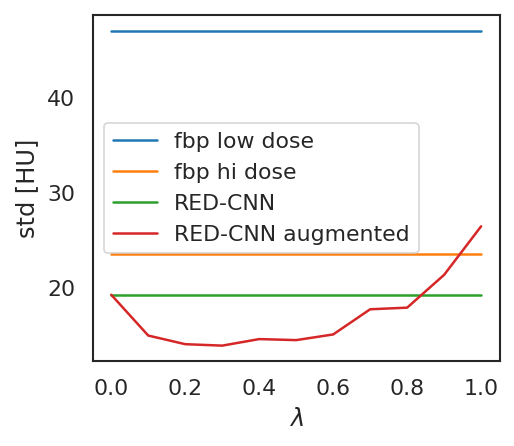

In [ ]:
sns.set_context('paper', font_scale=1.2)
sns.set_style('white')
f, ax = plt.subplots(figsize=(3.5, 3), dpi=150)
means['std [HU]']['fbp', 25].plot(ax=ax, label='fbp low dose')
means['std [HU]']['fbp', 100].plot(ax=ax, label='fbp hi dose')
means['std [HU]']['RED-CNN', 25].plot(ax=ax, label='RED-CNN')
means['std [HU]']['RED-CNN augmented', 25].plot(ax=ax, label='RED-CNN augmented')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('std [HU]')
plt.legend()
plt.savefig('figures/fig3_lambda_selection.png', bbox_inches='tight')

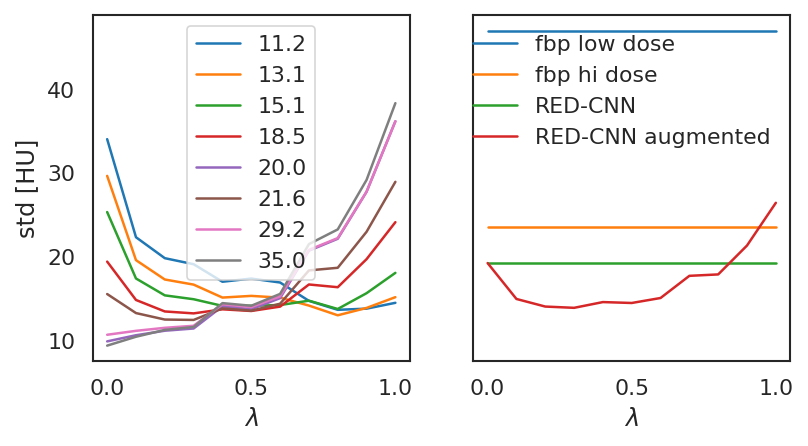

In [ ]:
sns.set_context('paper', font_scale=1.2)
sns.set_style('white')

f, axs = plt.subplots(1, 2, figsize=(6, 3), dpi=150, sharex=True, sharey=True)

for diam in sorted(df['effective diameter [cm]'].unique()):
    df[(df.recon!='fbp')&(df['Dose [%]']==25)&(df.recon=='RED-CNN augmented')&(df['effective diameter [cm]']==diam)].plot(x='lambda', y='std [HU]', label=diam,ax=axs[0])
axs[0].set_xlabel('$\lambda$')
axs[0].set_ylabel('std [HU]')

means['std [HU]']['fbp', 25].plot(ax=axs[1], label='fbp low dose')
means['std [HU]']['fbp', 100].plot(ax=axs[1], label='fbp hi dose')
means['std [HU]']['RED-CNN', 25].plot(ax=axs[1], label='RED-CNN')
means['std [HU]']['RED-CNN augmented', 25].plot(ax=axs[1], label='RED-CNN augmented')
axs[1].set_xlabel('$\lambda$')
axs[1].set_ylabel('std [HU]')
plt.legend(frameon=False)

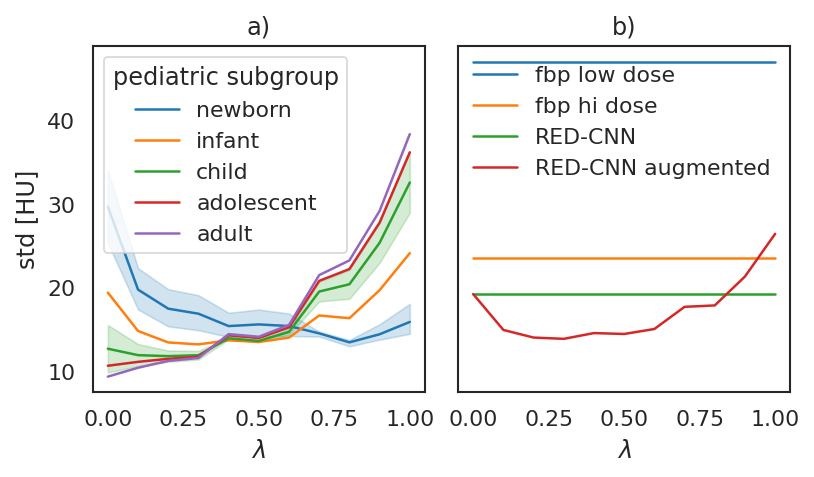

In [ ]:
f, axs = plt.subplots(1, 2, sharex=True, sharey=True, gridspec_kw=dict(wspace=0.1, hspace=0.1), figsize=(6, 3), dpi=150)
hue_order = ['newborn', 'infant', 'child', 'adolescent', 'adult']
sns.lineplot(data=df[(df['Dose [%]']==25) &
                     (df.recon=='RED-CNN augmented')],
             x='lambda', y='std [HU]', hue='pediatric subgroup', hue_order=hue_order, ax=axs[0])

means['std [HU]']['fbp', 25].plot(ax=axs[1], label='fbp low dose')
means['std [HU]']['fbp', 100].plot(ax=axs[1], label='fbp hi dose')
means['std [HU]']['RED-CNN', 25].plot(ax=axs[1], label='RED-CNN')
means['std [HU]']['RED-CNN augmented', 25].plot(ax=axs[1], label='RED-CNN augmented')
axs[0].set_title('a)')
axs[1].set_title('b)')
axs[0].set_xlabel('$\lambda$')
axs[1].set_xlabel('$\lambda$')
plt.legend(frameon=False)

<Axes: xlabel='lambda'>

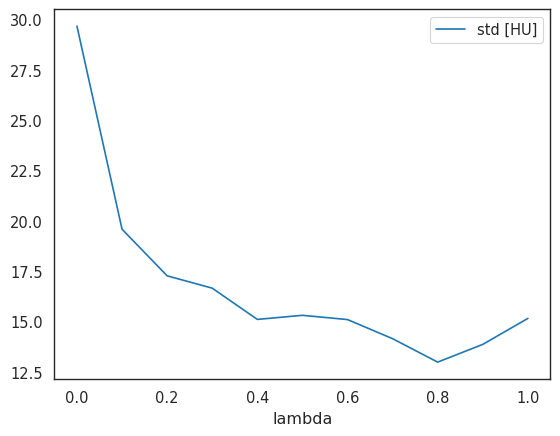

In [ ]:
df[(df.recon!='fbp')&(df['Dose [%]']==25)&(df.recon=='RED-CNN augmented')&(df['effective diameter [cm]']==13.1)].plot(x='lambda', y='std [HU]')

<Axes: xlabel='lambda', ylabel='std [HU]'>

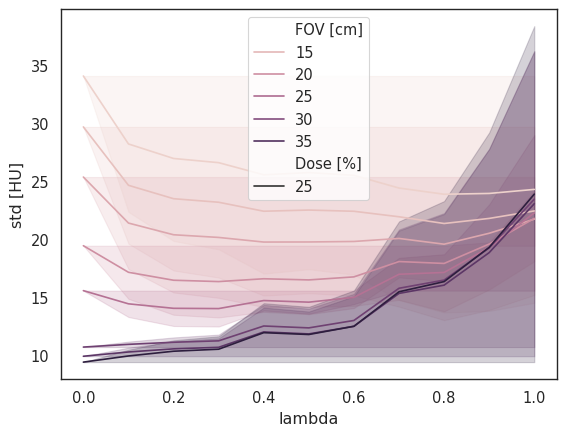

In [ ]:
sns.lineplot(data=df[(df.recon!='fbp')&(df['Dose [%]']==25)], x='lambda', y='std [HU]', hue='FOV [cm]', style='Dose [%]')